In [1]:
# preamble
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
import trackpy as tp
import numpy as np

import sys
sys.path.extend(['/Users/zsolt/Colloid_git/TractionRheoscopy'])
from data_analysis import static as da

In [2]:
# some metaData paths, etc
dpl_metaPath = '/Users/zsolt/Colloid/DATA/tfrGel09102018b/shearRun09232018a/tfrGel09102018b_shearRun09232018a_metaData.yaml'
stitched_fName_frmt = 'tfrGel09102018b_shearRun09232018a_stitched_sed_t{:03}.h5'
tracked_path = '/Users/zsolt/Colloid/DATA/tfrGel09102018b/shearRun09232018a/sed_stitched_t0_t135_maxDisp_1.2.h5'

In [3]:
tracked = tp.PandasHDFStoreBig(tracked_path)

In [4]:
tracked.get(0)

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,size_x,size_y,size_z,totalError,...,gel_Tracer_core,gel_Tracer_shell,sed_Background_core,sed_Background_shell,nonfluorescent_chunk_core,nonfluorescent_chunk_shell,gel_Background_core,gel_Background_shell,frame,particle
0,2.752150,31.624281,24.269251,0.462305,0.779087,0.230619,3.4,3.4,2.0,0.109775,...,42.08,211.72,2.40,85.530000,1.15,61.850000,11.36,344.479999,0,0
1,33.974827,5.905081,24.626056,0.092046,0.094127,0.064167,3.4,3.4,2.0,0.017940,...,26.51,164.59,9.06,108.160000,2.30,59.420000,4.22,370.520000,0,1
2,32.778206,42.345198,25.655144,0.128494,0.151793,0.092066,3.4,3.4,2.0,0.026717,...,11.05,16.33,19.51,142.770000,19.38,275.030000,13.80,313.659999,0,2
3,24.799956,18.050402,25.730064,0.302611,0.320617,0.164826,3.4,3.4,2.0,0.056407,...,15.49,25.23,13.74,89.070000,24.68,272.889999,27.40,366.949999,0,3
4,27.363568,6.223782,26.006511,0.167722,0.160246,0.108266,3.4,3.4,2.0,0.031231,...,21.22,190.40,8.61,79.950000,7.49,69.530000,32.10,388.429999,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944502,196.547161,200.163979,101.514355,0.049729,0.047522,0.036036,3.4,3.4,2.0,0.009581,...,1.16,8.93,57.99,393.410000,2.88,25.360000,4.93,34.650000,0,1528576
1944503,196.710742,204.166698,105.319236,0.055922,0.055143,0.044812,3.4,3.4,2.0,0.011259,...,0.66,5.74,54.17,493.420000,2.04,19.920000,3.70,40.310000,0,1528577
1944504,188.717395,209.820962,106.317807,0.058008,0.056057,0.046895,3.4,3.4,2.0,0.011642,...,0.33,2.95,62.16,553.939998,7.34,76.020000,3.66,36.390000,0,1528578
1944505,193.201012,229.863507,106.826927,0.061275,0.063210,0.053419,3.4,3.4,2.0,0.012911,...,0.58,5.06,59.03,489.009999,4.75,61.770000,4.37,42.120000,0,1528579


In [6]:
# OVERLOADS memory
col_list = list(tracked.get(0).keys())
#trajArray = da.loadData2Mem(tracked_path,col_list=col_list)

In [7]:
col_list

['x (um, imageStack)',
 'y (um, imageStack)',
 'z (um, imageStack)',
 'x_std',
 'y_std',
 'z_std',
 'size_x',
 'size_y',
 'size_z',
 'totalError',
 'disc_size',
 'mass',
 'raw_mass',
 'signal',
 'background',
 'sed_Colloid_core',
 'sed_Colloid_shell',
 'fluorescent_chunk_core',
 'fluorescent_chunk_shell',
 'gel_Tracer_core',
 'gel_Tracer_shell',
 'sed_Background_core',
 'sed_Background_shell',
 'nonfluorescent_chunk_core',
 'nonfluorescent_chunk_shell',
 'gel_Background_core',
 'gel_Background_shell',
 'frame',
 'particle']

In [13]:
t0_pid = pd.Index(tracked.get(0)['particle'].values)
t135_pid = pd.Index(tracked.get(135)['particle'].values)
completeTraj = t0_pid.intersection(t135_pid)

In [25]:
# make a plot of all the particle that are probably not colloids regardless of whether they were tracked.
# stream results to xyz file

tmp = tracked.get(0)
tmp


,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,size_x,size_y,size_z,totalError,...,gel_Tracer_core,gel_Tracer_shell,sed_Background_core,sed_Background_shell,nonfluorescent_chunk_core,nonfluorescent_chunk_shell,gel_Background_core,gel_Background_shell,frame,particle
0,2.752150,31.624281,24.269251,0.462305,0.779087,0.230619,3.4,3.4,2.0,0.109775,...,42.08,211.72,2.40,85.530000,1.15,61.850000,11.36,344.479999,0,0
1,33.974827,5.905081,24.626056,0.092046,0.094127,0.064167,3.4,3.4,2.0,0.017940,...,26.51,164.59,9.06,108.160000,2.30,59.420000,4.22,370.520000,0,1
2,32.778206,42.345198,25.655144,0.128494,0.151793,0.092066,3.4,3.4,2.0,0.026717,...,11.05,16.33,19.51,142.770000,19.38,275.030000,13.80,313.659999,0,2
3,24.799956,18.050402,25.730064,0.302611,0.320617,0.164826,3.4,3.4,2.0,0.056407,...,15.49,25.23,13.74,89.070000,24.68,272.889999,27.40,366.949999,0,3
4,27.363568,6.223782,26.006511,0.167722,0.160246,0.108266,3.4,3.4,2.0,0.031231,...,21.22,190.40,8.61,79.950000,7.49,69.530000,32.10,388.429999,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1944502,196.547161,200.163979,101.514355,0.049729,0.047522,0.036036,3.4,3.4,2.0,0.009581,...,1.16,8.93,57.99,393.410000,2.88,25.360000,4.93,34.650000,0,1528576
1944503,196.710742,204.166698,105.319236,0.055922,0.055143,0.044812,3.4,3.4,2.0,0.011259,...,0.66,5.74,54.17,493.420000,2.04,19.920000,3.70,40.310000,0,1528577
1944504,188.717395,209.820962,106.317807,0.058008,0.056057,0.046895,3.4,3.4,2.0,0.011642,...,0.33,2.95,62.16,553.939998,7.34,76.020000,3.66,36.390000,0,1528578
1944505,193.201012,229.863507,106.826927,0.061275,0.063210,0.053419,3.4,3.4,2.0,0.012911,...,0.58,5.06,59.03,489.009999,4.75,61.770000,4.37,42.120000,0,1528579


In [46]:
garbage_bool = tmp['sed_Colloid_core'] < 10
tmp[garbage_bool]

NameError: name 'tmp' is not defined

In [49]:
path = '/Users/zsolt/Colloid/DATA/tfrGel09102018b/shearRun09232018a/scratch/false_particle_xyz'
fName_frmt = 'sedColloidChannel_max10_t{:03}.xyz'

#da.df2xyz(tmp[garbage_bool], path, fName_frmt.format(0))

In [30]:
tracked.close()

In [50]:
with tp.PandasHDFStoreBig(tracked_path,'r') as s:
    for t in range(136):
        loc_df = s.get(t)
        garbage_bool = loc_df['sed_Colloid_core'] < 10
        da.df2xyz(loc_df[garbage_bool], path, fName_frmt.format(t))
        

In [45]:
loc_df.keys()[17]

'fluorescent_chunk_core'

In [48]:
fName_frmt

'sedColloidChannel_max7_t{:03}.xyz'

In [74]:
with tp.PandasHDFStoreBig(tracked_path,'r') as s: tmp = s.get(0)

In [69]:
#tmp.set_index('particle', inplace=True)


In [84]:
tmp.loc[1797225]

x (um, imageStack)            4.988434e+01
y (um, imageStack)            1.859353e+02
z (um, imageStack)            1.029381e+02
x_std                         6.930788e-02
y_std                         6.706053e-02
z_std                         5.385114e-02
size_x                        3.400000e+00
size_y                        3.400000e+00
size_z                        2.000000e+00
totalError                    1.372044e-02
disc_size                     2.000000e-01
mass                          2.879034e+06
raw_mass                      2.982498e+06
signal                        1.985512e+04
background                    3.019838e+03
sed_Colloid_core              8.850000e+00
sed_Colloid_shell             1.693800e+02
fluorescent_chunk_core        3.910000e+00
fluorescent_chunk_shell       3.519000e+01
gel_Tracer_core               6.750000e+00
gel_Tracer_shell              2.968000e+01
sed_Background_core           3.688000e+01
sed_Background_shell          2.814400e+02
nonfluoresc

In [76]:
tmp.loc[93999]

x (um, imageStack)            1.580212e+02
y (um, imageStack)            8.655717e+01
z (um, imageStack)            2.731718e+01
x_std                         2.906438e-01
y_std                         2.705620e-01
z_std                         1.460640e-01
size_x                        3.400000e+00
size_y                        3.400000e+00
size_z                        2.000000e+00
totalError                    5.064896e-02
disc_size                     2.000000e-01
mass                          3.106265e+05
raw_mass                      3.345462e+05
signal                        5.807253e+03
background                    1.000000e-07
sed_Colloid_core              1.340000e+00
sed_Colloid_shell             1.295000e+01
fluorescent_chunk_core        2.857000e+01
fluorescent_chunk_shell       9.352000e+01
gel_Tracer_core               5.887000e+01
gel_Tracer_shell              3.514500e+02
sed_Background_core           2.000000e-01
sed_Background_shell          4.842000e+01
nonfluoresc

In [94]:
fName = 'sed_stitched.h5'
stitched_path_frmt = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/{}'
scratch_path_frmt = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/scratch/{}'
scratch_path = '/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/scratch'

In [86]:
with tp.PandasHDFStoreBig(stitched_path_frmt.format(fName),'r') as s: tmp = s.get(0)

In [99]:
da.df2xyz(tmp[tmp['fluorescent_chunk_core']>tmp['sed_Colloid_core']],scratch_path,'buf.xyz')

'/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/scratch/buf.xyz'

In [101]:
tmp.loc[282187]

x (um, imageStack)            2.335820e+01
y (um, imageStack)            2.051219e+02
z (um, imageStack)            3.262567e+01
x_std                         5.452649e-02
y_std                         5.444391e-02
z_std                         5.694577e-02
size_x                        3.400000e+00
size_y                        3.400000e+00
size_z                        2.000000e+00
totalError                    1.230788e-02
disc_size                     2.000000e-01
mass                          7.319617e+06
raw_mass                      7.435047e+06
signal                        2.214159e+04
background                    8.222346e+03
sed_Colloid_core              4.440000e+00
sed_Colloid_shell             9.990000e+01
fluorescent_chunk_core        3.958000e+01
fluorescent_chunk_shell       2.668300e+02
gel_Tracer_core               1.096000e+01
gel_Tracer_shell              5.445000e+01
sed_Background_core           2.884000e+01
sed_Background_shell          2.796700e+02
nonfluoresc

'/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/scratch/buf.xyz'

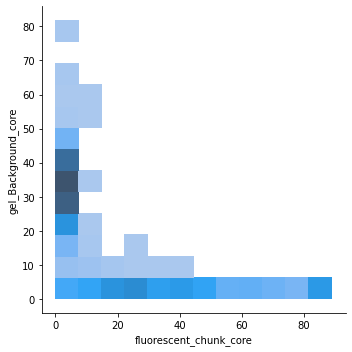

In [107]:
sedFluorComp_bool = (tmp['fluorescent_chunk_core']>tmp['sed_Colloid_core']) | (tmp['gel_Tracer_core']>tmp['sed_Colloid_core'])
sns.displot(data=tmp[sedFluorComp_bool],x='fluorescent_chunk_core', y = 'gel_Background_core')
da.df2xyz(tmp[sedFluorComp_bool],scratch_path,'buf.xyz')

In [108]:
da.df2xyz(tmp[~sedFluorComp_bool],scratch_path,'buf_complement.xyz')

'/Users/zsolt/Colloid/DATA/tfrGel10212018x/tfrGel10212018A_shearRun10292018f/scratch/buf_complement.xyz'

In [106]:
tmp[sedFluorComp_bool]

,"x (um, imageStack)","y (um, imageStack)","z (um, imageStack)",x_std,y_std,z_std,size_x,size_y,size_z,totalError,...,gel_Tracer_core,gel_Tracer_shell,sed_Background_core,sed_Background_shell,nonfluorescent_chunk_core,nonfluorescent_chunk_shell,gel_Background_core,gel_Background_shell,frame,particle
0,28.096930,10.316645,25.167796,0.102354,0.110985,0.060779,3.4,3.4,2.0,0.019610,...,64.54,213.66,1.76,233.639999,0.01,8.890000,0.13,249.150000,0,0
365,2.345987,11.288802,27.579926,0.208915,0.187393,0.145022,3.4,3.4,2.0,0.038921,...,0.57,6.72,74.37,514.520002,0.11,1.300000,0.71,5.190000,0,360
870,25.597852,41.542871,28.722713,0.164706,0.148497,0.120614,3.4,3.4,2.0,0.031269,...,9.19,32.60,19.35,135.140000,34.29,418.940001,14.71,128.930000,0,857
2837,31.495154,22.168547,33.240931,0.093499,0.119745,0.109721,3.4,3.4,2.0,0.024002,...,3.74,10.89,16.29,538.270002,0.69,5.480000,1.90,14.270000,0,2800
4518,47.120595,16.387663,37.301348,0.061829,0.058282,0.043570,3.4,3.4,2.0,0.011756,...,1.34,15.53,4.13,496.610001,0.33,16.500000,0.45,13.780000,0,4472
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157022,211.347983,209.256076,85.512749,0.276309,0.270440,0.184816,3.4,3.4,2.0,0.052397,...,14.65,112.04,32.93,256.790000,0.24,1.950000,27.17,272.449999,0,963094
1157031,230.223801,208.906236,85.642809,0.623555,0.654708,0.352791,3.4,3.4,2.0,0.116668,...,14.30,129.71,28.52,208.720001,0.46,2.230000,33.20,258.999999,0,963102
1157035,207.792486,232.208149,85.651412,0.735345,0.736821,0.434753,3.4,3.4,2.0,0.136322,...,9.21,96.02,28.68,197.460000,0.61,5.430000,41.41,343.200000,0,963106
1157431,214.339214,217.666483,84.877823,0.516442,0.528999,0.312195,3.4,3.4,2.0,0.097063,...,8.44,89.48,48.16,312.650000,0.94,3.350000,23.72,192.719999,0,963437
